
K-Means Customer Segmentation Analysis


In [1]:
#1 Importing the librariesimport numpy as np

In [2]:
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


1. อ่านไฟล์

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


2. แสดงผล 10 บรรทัดแรก

In [4]:
df[:10]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


3. หาค่าสถิติพื้นฐาน

In [5]:
df.describe ()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


4. ดูการแจกแจง โดยแสดงกราฟแท่งของลูกค้าแยกตามเพศ มีตัวอย่างคำสั่งในการ plot หลายรูปแบบ

5. สร้าง histogram ของอายุ แบ่งเป็น 10 bin

6.ทำ scatter plot ของข้อมูล Age, Income 

7.พิจารณาค่า K ที่ดีที่สุดเพื่อนำไปทำ K-Mean clustering

In [6]:
from sklearn import preprocessing

#creating labelEncoder
number = preprocessing.LabelEncoder()
df['Gender'] = number.fit_transform(df['Gender'])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
245,246,1,30,297,69
246,247,0,56,311,14
247,248,1,29,313,90
248,249,0,19,316,32


In [7]:
df = df[['Age','Annual Income (k$)']]

In [8]:
df

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
245,30,297
246,56,311
247,29,313
248,19,316


C:\Users\Pinga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pinga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pinga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pinga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

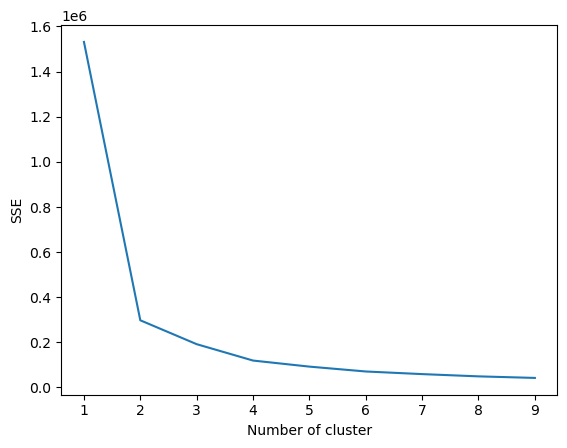

In [9]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

8. ได้ค่า k= 4 ในการจัดกลุ่มโดยวิธี K-Means

In [10]:
k_means = KMeans(n_clusters=4)
k_means.fit(df)
cluster_scale_pred = k_means.fit_predict(df)

C:\Users\Pinga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pinga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pinga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Pinga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

ข้อ 9 ทำ scatter plot ที่แสดง centroid

In [11]:
cluster = k_means.predict(df)
cluster_label = k_means.labels_

[[ 40.1954023   36.5862069 ]
 [ 37.33333333 270.9       ]
 [ 37.93693694  77.97297297]
 [ 36.13636364 178.77272727]]


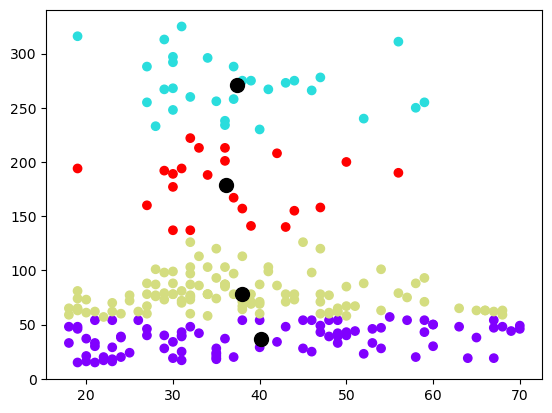

In [13]:
plt.scatter(df['Age'], df['Annual Income (k$)'], c=cluster_label, marker="o",cmap='rainbow')
centers = k_means.cluster_centers_
print(centers) #พิมพ์จุดกลาง
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100)

In [14]:
centers

array([[ 40.1954023 ,  36.5862069 ],
       [ 37.33333333, 270.9       ],
       [ 37.93693694,  77.97297297],
       [ 36.13636364, 178.77272727]])